In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, log_loss, brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN, ModelCheckpoint
from keras.optimizers.schedules import ExponentialDecay
import tensorflow as tf 


import matplotlib.pyplot as plt

import joblib

In [250]:
df = pd.read_csv("../3 flood data analysis/output/Flood_Type_data.csv")
df.head()

,median_sea_level_height_msl_30,mean_sea_level_height_msl_30,mean_sea_level_height_msl_5,mean_sea_level_height_msl_1,max_sea_level_height_msl_1,lat,lon,Sea distance,Type,median_river_discharge_30,...,max_soil_moisture_28_to_100cm_1,max_soil_moisture_100_to_255cm_1,elevation,median_wave_height_30,mean_wave_height_30,mean_wave_height_5,mean_wave_height_1,max_wave_height_1,month,Type_cd
0,0.80470,0.802224,1.036652,0.958875,1.2597,41.324590,19.456469,5300.276600,River,0.383566,...,0.427,0.352,3.0,0.70,0.899865,1.667167,2.015833,3.14,11,2
1,0.81185,0.807646,0.982063,0.889192,1.1707,41.324590,19.456469,5300.276600,River,0.570363,...,0.428,0.360,3.0,0.74,0.923091,1.512000,1.275000,2.10,12,2
2,0.81370,0.813203,0.957242,0.940275,1.1667,41.324590,19.456469,5300.276600,River,0.625549,...,0.428,0.365,3.0,0.76,0.934274,1.224000,0.780833,1.22,12,2
3,0.82515,0.824850,0.991565,1.146608,1.4819,41.324590,19.456469,5300.276600,River,0.782379,...,0.422,0.368,3.0,0.78,0.961371,1.237667,1.142500,1.90,12,2
4,0.80470,0.802224,1.036652,0.958875,1.2597,41.786073,19.646076,11519.642694,River,0.428894,...,0.408,0.373,20.0,0.70,0.899865,1.667167,2.015833,3.14,11,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19860 entries, 0 to 19859
Data columns (total 82 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   median_sea_level_height_msl_30        19860 non-null  float64
 1   mean_sea_level_height_msl_30          19860 non-null  float64
 2   mean_sea_level_height_msl_5           19860 non-null  float64
 3   mean_sea_level_height_msl_1           19860 non-null  float64
 4   max_sea_level_height_msl_1            19860 non-null  float64
 5   lat                                   19860 non-null  float64
 6   lon                                   19860 non-null  float64
 7   Sea distance                          19860 non-null  float64
 8   Type                                  19860 non-null  object 
 9   median_river_discharge_30             19860 non-null  float64
 10  mean_river_discharge_30               19860 non-null  float64
 11  mean_river_disc

In [251]:

X = df.drop(["lat", "lon", "Type", "Type_cd"], axis=1)
y = df.loc[:,"Type_cd"] # trying to predict flood type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

In [34]:
model = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",LogisticRegression(max_iter=1000))
])

In [35]:
model.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('Classifier', LogisticRegression(max_iter=1000))])

In [36]:
y_pred = model.predict(X_test)
# Print Scores 
print(f"Train score: {model.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 0.9375
Accuracy: 0.93932527693857
Macro F1 Score: 0.5951655102190604
Micro F1 Score: 0.93932527693857

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69        34
           1       0.69      0.16      0.26       210
           2       0.94      0.99      0.97      3684
           3       0.62      0.36      0.46        44

    accuracy                           0.94      3972
   macro avg       0.81      0.51      0.60      3972
weighted avg       0.93      0.94      0.92      3972

Confusion Matrix:
 [[  18    0   16    0]
 [   0   34  172    4]
 [   0   15 3663    6]
 [   0    0   28   16]]


In [37]:
RF_Grid = GridSearchCV(cv=5,
             estimator=RandomForestClassifier(random_state=24),
             param_grid={},
             return_train_score=True,
             scoring="f1_macro")

model = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",RF_Grid)
])

model.fit(X_train, y_train)

# Print Scores 
y_pred = model.predict(X_test)
# Print Scores 
print(f"Train score: {model.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 1.0
Accuracy: 0.9675226586102719
Macro F1 Score: 0.8366145706220507
Micro F1 Score: 0.9675226586102719

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.89        34
           1       0.99      0.49      0.65       210
           2       0.97      1.00      0.98      3684
           3       1.00      0.70      0.83        44

    accuracy                           0.97      3972
   macro avg       0.99      0.75      0.84      3972
weighted avg       0.97      0.97      0.96      3972

Confusion Matrix:
 [[  27    0    7    0]
 [   0  102  108    0]
 [   0    1 3683    0]
 [   0    0   13   31]]


In [ ]:
RF_Grid = GridSearchCV(cv=5,
             estimator=XGBClassifier(random_state=24),
             param_grid={},
             return_train_score=True,
             scoring="f1_macro")

model = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",RF_Grid)
])

model.fit(X_train, y_train)

# Print Scores 
y_pred = model.predict(X_test)
# Print Scores 
print(f"Train score: {model.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 1.0
Accuracy: 0.9813695871097684
Macro F1 Score: 0.9086579132535846
Micro F1 Score: 0.9813695871097684

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89        34
           1       0.99      0.71      0.83       210
           2       0.98      1.00      0.99      3684
           3       1.00      0.86      0.93        44

    accuracy                           0.98      3972
   macro avg       0.98      0.85      0.91      3972
weighted avg       0.98      0.98      0.98      3972

Confusion Matrix:
 [[  28    0    6    0]
 [   0  150   60    0]
 [   0    2 3682    0]
 [   1    0    5   38]]


In [39]:
RF_Grid = GridSearchCV(cv=5,
             estimator=SVC(),
             param_grid={},
             return_train_score=True,
             scoring="f1_macro")

model = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",RF_Grid)
])

model.fit(X_train, y_train)

# Print Scores 
y_pred = model.predict(X_test)
# Print Scores 
print(f"Train score: {model.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 0.6576689990320204
Accuracy: 0.9451158106747231
Macro F1 Score: 0.5828803777730258
Micro F1 Score: 0.9451158106747231

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69        34
           1       0.92      0.22      0.36       210
           2       0.95      1.00      0.97      3684
           3       1.00      0.18      0.31        44

    accuracy                           0.95      3972
   macro avg       0.97      0.48      0.58      3972
weighted avg       0.94      0.95      0.93      3972

Confusion Matrix:
 [[  18    0   16    0]
 [   0   47  163    0]
 [   0    3 3681    0]
 [   0    1   35    8]]


In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
} 

grid_search_XGBC = GridSearchCV(XGBClassifier(random_state=24), param_grid, cv=5, scoring="f1_macro")
model_grid__XGBC = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",grid_search_XGBC)
])
model_grid__XGBC.fit(X_train, y_train)

y_pred = model_grid__XGBC.predict(X_test)
# Print Scores 
print(f"Train score: {model_grid__XGBC.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

print(grid_search_XGBC.best_params_)

Train score: 1.0
Accuracy: 0.9841389728096677
Macro F1 Score: 0.9318149621216436
Micro F1 Score: 0.9841389728096677

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        34
           1       0.99      0.74      0.85       210
           2       0.98      1.00      0.99      3684
           3       1.00      0.93      0.96        44

    accuracy                           0.98      3972
   macro avg       0.98      0.89      0.93      3972
weighted avg       0.98      0.98      0.98      3972

Confusion Matrix:
 [[  30    0    4    0]
 [   0  156   54    0]
 [   0    2 3682    0]
 [   1    0    2   41]]
{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300}


In [141]:
# Convert data to TensorFlow Dataset
def create_dataset(X, y, batch_size=32, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X))  # Shuffle the entire dataset
    dataset = dataset.batch(batch_size)  # Create batches
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)  # Optimize performance
    return dataset

# Create training and testing datasets
batch_size = 64
train_dataset = create_dataset(X_train, pd.get_dummies(y_train, prefix='Type'), batch_size=batch_size)
val_dataset = create_dataset(X_test, pd.get_dummies(y_test, prefix='Type'), batch_size=batch_size)

In [ ]:
input_shape = (X_train.shape[1],)
model = Sequential([
    Input(shape=input_shape),
    Dense(128, activation='relu', kernel_initializer='lecun_normal',
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(4, activation='softmax')
])

In [ ]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=3e-4,
    decay_steps=1000,
    decay_rate=0.9
)

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),  
    y=y_train                  
)
class_weights = dict(enumerate(class_weights))

callbacks = [
    EarlyStopping(monitor='val_f1_macro', patience=25, restore_best_weights=True, mode='max'),
    TerminateOnNaN()
]

loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

In [149]:
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss=loss,
    metrics=[
        'accuracy',
        tf.keras.metrics.F1Score(average='macro', name='f1_macro'),
        tf.keras.metrics.F1Score(average='micro', name='f1_micro')
    ]
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=callbacks,
    class_weight=class_weights  
)

Epoch 1/300


249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6031 - f1_macro: 0.2778 - f1_micro: 0.6031 - loss: 1.2306 - val_accuracy: 0.4557 - val_f1_macro: 0.2829 - val_f1_micro: 0.4557 - val_loss: 1.2133
Epoch 2/300
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5696 - f1_macro: 0.2723 - f1_micro: 0.5696 - loss: 1.1314 - val_accuracy: 0.4552 - val_f1_macro: 0.2242 - val_f1_micro: 0.4552 - val_loss: 1.1970
Epoch 3/300
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5650 - f1_macro: 0.2544 - f1_micro: 0.5650 - loss: 1.1539 - val_accuracy: 0.3585 - val_f1_macro: 0.1722 - val_f1_micro: 0.3585 - val_loss: 1.2331
Epoch 4/300
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5518 - f1_macro: 0.2592 - f1_micro: 0.5518 - loss: 1.2194 - val_accuracy: 0.6045 - val_f1_macro: 0.2786 - val_f1_micro: 0.6045 - val_loss: 1.0845
Epoch 5/300
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5679 - f1_macro: 0.2636 - f1_micro: 0.5679 - loss: 1.2035 - val_accuracy: 0.2372 - val_f1_mac

In [150]:
y_pred = np.argmax(model.predict(X_test), axis=1)
# Print Scores 
print(f"Train score: {model_grid__XGBC.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
Train score: 1.0
Accuracy: 0.669436052366566
Macro F1 Score: 0.32036224892609905
Micro F1 Score: 0.669436052366566

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.56      0.12        34
           1       0.19      0.43      0.26       210
           2       0.97      0.68      0.80      3684
           3       0.05      0.73      0.10        44

    accuracy                           0.67      3972
   macro avg       0.32      0.60      0.32      3972
weighted avg       0.91      0.67      0.76      3972

Confusion Matrix:
 [[  19    0   11    4]
 [   4   90   66   50]
 [ 247  393 2518  526]
 [   4    1    7   32]]


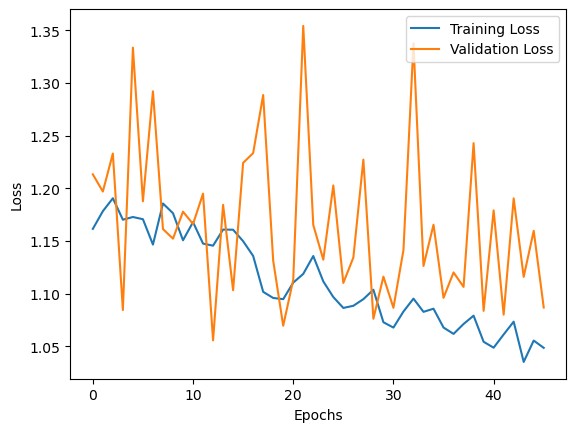

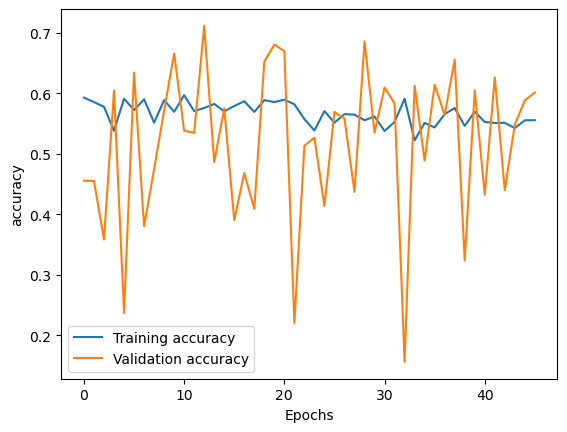

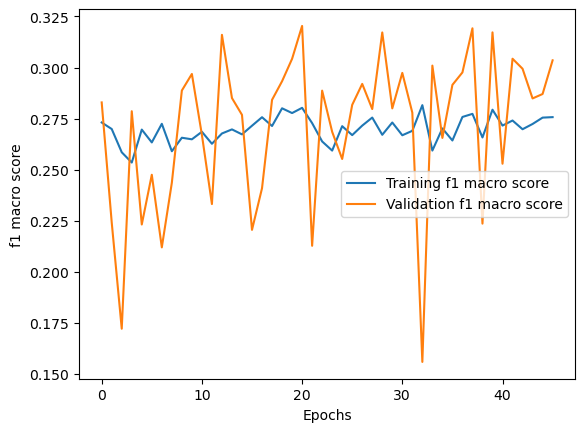

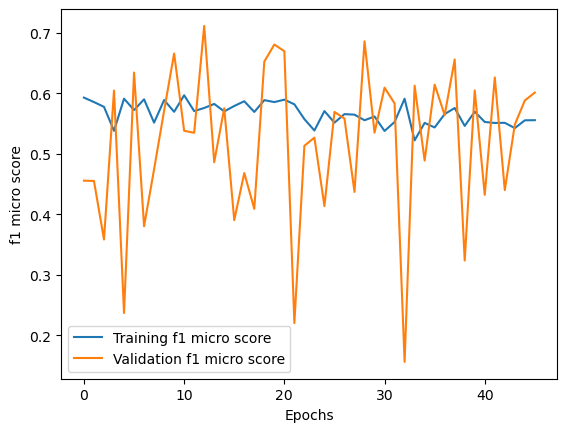

In [157]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['f1_macro'], label='Training f1 macro score')
plt.plot(history.history['val_f1_macro'], label='Validation f1 macro score')
plt.xlabel('Epochs')
plt.ylabel('f1 macro score')
plt.legend()
plt.show()

plt.plot(history.history['f1_micro'], label='Training f1 micro score')
plt.plot(history.history['val_f1_micro'], label='Validation f1 micro score')
plt.xlabel('Epochs')
plt.ylabel('f1 micro score')
plt.legend()
plt.show()

In [170]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [6, 10, 14],
} 
grid_search_XGBC = GridSearchCV(XGBClassifier(random_state=24), param_grid, cv=5, scoring='f1_macro')
model_XGBC = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",grid_search_XGBC)
])
model_XGBC.fit(X, y)

y_pred = grid_search_XGBC.predict(X_test)

print(f"Train score: {grid_search_XGBC.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

print(grid_search_XGBC.best_params_)

Train score: 0.16648506790307424
Accuracy: 0.412134944612286
Macro F1 Score: 0.1663573114321755
Micro F1 Score: 0.412134944612286

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.05      0.58      0.10       210
           2       0.93      0.41      0.57      3684
           3       0.00      0.00      0.00        44

    accuracy                           0.41      3972
   macro avg       0.24      0.25      0.17      3972
weighted avg       0.86      0.41      0.53      3972

Confusion Matrix:
 [[   0   11   21    2]
 [   0  122   88    0]
 [   0 2168 1515    1]
 [   0   31   13    0]]
{'learning_rate': 0.4, 'max_depth': 6, 'n_estimators': 300}


c:\Users\ad98\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ad98\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ad98\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [172]:
model_XGBC_best_params = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",XGBClassifier(**grid_search_XGBC.best_params_))
])
model_XGBC_best_params.fit(X, y)


y_pred = model_XGBC_best_params.predict(X_test)

print(f"Train score: {model_XGBC_best_params.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 1.0
Accuracy: 1.0
Macro F1 Score: 1.0
Micro F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00      3684
           3       1.00      1.00      1.00        44

    accuracy                           1.00      3972
   macro avg       1.00      1.00      1.00      3972
weighted avg       1.00      1.00      1.00      3972

Confusion Matrix:
 [[  34    0    0    0]
 [   0  210    0    0]
 [   0    0 3684    0]
 [   0    0    0   44]]


In [276]:
feature_names = X_train.columns.tolist() 
feature_map = {f'f{i}': name for i, name in enumerate(feature_names)}
xgb_model = model_XGBC_best_params.named_steps['Classifier']
importance_weights = xgb_model.feature_importances_
importance_gain = xgb_model.get_booster().get_score(importance_type='gain')
importance_cover = xgb_model.get_booster().get_score(importance_type='cover')

importance_gain_mapped = {
    feature_map[key]: value 
    for key, value in importance_gain.items()
    if key in feature_map
}

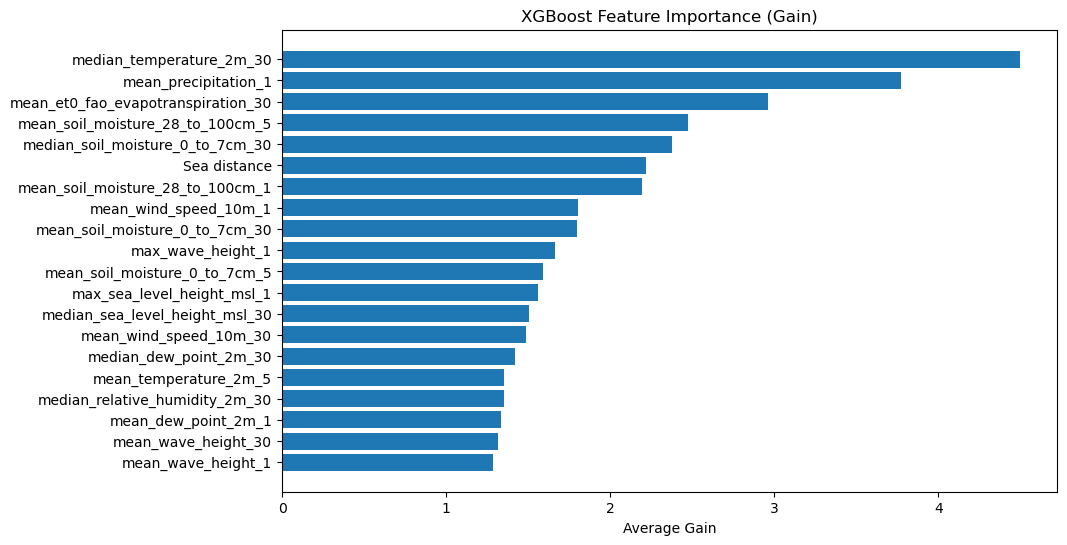

In [277]:
importance_df = pd.DataFrame({
    'feature': list(importance_gain_mapped.keys()),
    'gain': list(importance_gain_mapped.values())
}).sort_values('gain', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:20], importance_df['gain'][:20])
plt.gca().invert_yaxis()
plt.title('XGBoost Feature Importance (Gain)')
plt.xlabel('Average Gain')
plt.show()

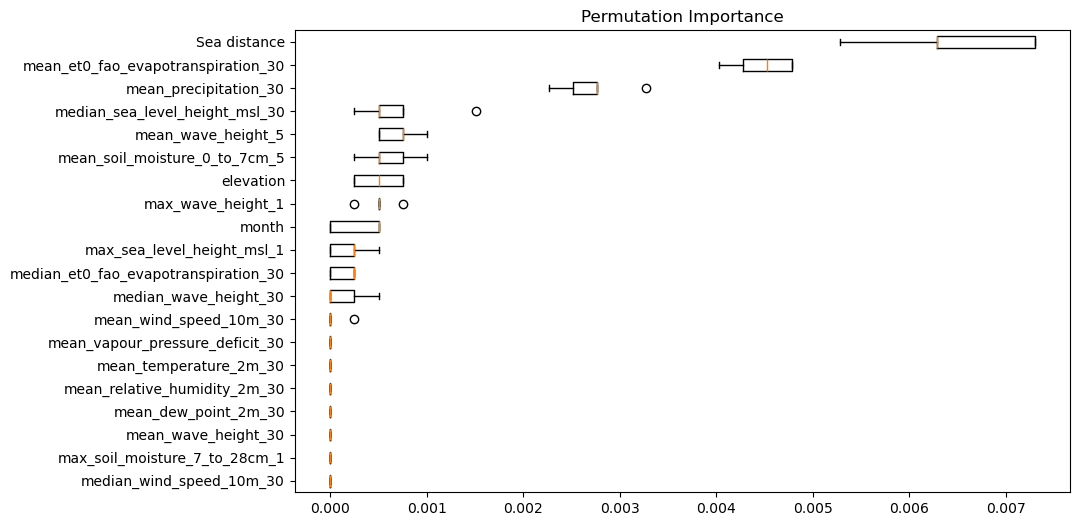

In [262]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance (works with full pipeline)
result = permutation_importance(
    model_XGBC_best_params,  # Use entire pipeline
    X_test, 
    y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# Organize results
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.boxplot(
    result.importances[sorted_idx[-20:]].T,  # Top 20 features
    vert=False,
    labels=X_test.columns[sorted_idx[-20:]]
)
plt.title("Permutation Importance")
plt.show()

In [175]:
joblib.dump(model_XGBC_best_params, 'output/model_XGBC_flood_type.pkl')

['output/model_XGBC_flood_type.pkl']

In [280]:
df_complete = pd.read_csv("../3 flood data analysis/output/complete_flood_data.csv")

In [164]:
df_complete.head()

,median_sea_level_height_msl_30,mean_sea_level_height_msl_30,mean_sea_level_height_msl_5,mean_sea_level_height_msl_1,max_sea_level_height_msl_1,lat,lon,Sea distance,Type,median_river_discharge_30,...,max_soil_moisture_100_to_255cm_1,elevation,median_wave_height_30,mean_wave_height_30,mean_wave_height_5,mean_wave_height_1,max_wave_height_1,month,Type_cd,is_flood
0,0.80470,0.802224,1.036652,0.958875,1.2597,41.324590,19.456469,5300.276600,River,0.383566,...,0.352,3.0,0.70,0.899865,1.667167,2.015833,3.14,11,2,1
1,0.81185,0.807646,0.982063,0.889192,1.1707,41.324590,19.456469,5300.276600,River,0.570363,...,0.360,3.0,0.74,0.923091,1.512000,1.275000,2.10,12,2,1
2,0.81370,0.813203,0.957242,0.940275,1.1667,41.324590,19.456469,5300.276600,River,0.625549,...,0.365,3.0,0.76,0.934274,1.224000,0.780833,1.22,12,2,1
3,0.82515,0.824850,0.991565,1.146608,1.4819,41.324590,19.456469,5300.276600,River,0.782379,...,0.368,3.0,0.78,0.961371,1.237667,1.142500,1.90,12,2,1
4,0.80470,0.802224,1.036652,0.958875,1.2597,41.786073,19.646076,11519.642694,River,0.428894,...,0.373,20.0,0.70,0.899865,1.667167,2.015833,3.14,11,2,1


In [165]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119794 entries, 0 to 119793
Data columns (total 83 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   median_sea_level_height_msl_30        119794 non-null  float64
 1   mean_sea_level_height_msl_30          119794 non-null  float64
 2   mean_sea_level_height_msl_5           119794 non-null  float64
 3   mean_sea_level_height_msl_1           119794 non-null  float64
 4   max_sea_level_height_msl_1            119794 non-null  float64
 5   lat                                   119794 non-null  float64
 6   lon                                   119794 non-null  float64
 7   Sea distance                          119794 non-null  float64
 8   Type                                  119794 non-null  object 
 9   median_river_discharge_30             119794 non-null  float64
 10  mean_river_discharge_30               119794 non-null  float64
 11  

In [281]:
X = df_complete.drop(["lat", "lon", "Type", "Type_cd", "is_flood"], axis=1)
y = df_complete.loc[:,"is_flood"] # trying to predict flood
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

In [178]:
model = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",LogisticRegression())
])
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(f"Train score: {model.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 0.890071477017791
Accuracy: 0.8936933928795024
Macro F1 Score: 0.7764227460129711
Micro F1 Score: 0.8936933928795024

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     19987
           1       0.77      0.51      0.61      3972

    accuracy                           0.89     23959
   macro avg       0.84      0.74      0.78     23959
weighted avg       0.89      0.89      0.88     23959

Confusion Matrix:
 [[19382   605]
 [ 1942  2030]]


c:\Users\ad98\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
RF_Grid = GridSearchCV(cv=5,
             estimator=RandomForestClassifier(random_state=24),
             param_grid={},
             return_train_score=True,
             scoring="f1_macro")

model = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",RF_Grid)
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Train score: {model.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 1.0
Accuracy: 0.9826787428523728
Macro F1 Score: 0.9674289301081865
Micro F1 Score: 0.9826787428523728

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19987
           1       0.99      0.90      0.95      3972

    accuracy                           0.98     23959
   macro avg       0.99      0.95      0.97     23959
weighted avg       0.98      0.98      0.98     23959

Confusion Matrix:
 [[19969    18]
 [  397  3575]]


In [180]:
RF_Grid = GridSearchCV(cv=5,
             estimator=XGBClassifier(random_state=24),
             param_grid={},
             return_train_score=True,
             scoring="f1_macro")

model = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",RF_Grid)
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Train score: {model.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 0.992356721669623
Accuracy: 0.9876455611669936
Macro F1 Score: 0.9771949450269299
Micro F1 Score: 0.9876455611669936

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19987
           1       0.99      0.94      0.96      3972

    accuracy                           0.99     23959
   macro avg       0.99      0.97      0.98     23959
weighted avg       0.99      0.99      0.99     23959

Confusion Matrix:
 [[19941    46]
 [  250  3722]]


In [181]:
RF_Grid = GridSearchCV(cv=5,
             estimator=SVC(),
             param_grid={},
             return_train_score=True,
             scoring="f1_macro")

model = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",RF_Grid)
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Train score: {model.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 0.890194352458036
Accuracy: 0.9437372177469844
Macro F1 Score: 0.8891761267673393
Micro F1 Score: 0.9437372177469844

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     19987
           1       0.91      0.73      0.81      3972

    accuracy                           0.94     23959
   macro avg       0.93      0.86      0.89     23959
weighted avg       0.94      0.94      0.94     23959

Confusion Matrix:
 [[19711   276]
 [ 1072  2900]]


In [220]:
tf.data.Dataset.from_tensor_slices((X_train, y_train))

<_TensorSliceDataset element_spec=(TensorSpec(shape=(78,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [212]:
# Create training and testing datasets
train_dataset = create_dataset(X_train, y_train, batch_size=batch_size)
val_dataset = create_dataset(X_test, y_test, batch_size=batch_size)

In [221]:
train_dataset = train_dataset.map(lambda x, y: (x, tf.expand_dims(y, axis=-1)))
val_dataset = val_dataset.map(lambda x, y: (x, tf.expand_dims(y, axis=-1)))

In [235]:
input_shape = (X_train.shape[1],)
model = Sequential([
    Input(shape=input_shape),
    Dense(512, activation='selu', kernel_initializer='lecun_normal',
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1024, activation='swish', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='swish', kernel_regularizer=l2(1e-4)),
    Dense(1, activation='sigmoid')
])

In [242]:
class_weights

array([0.59936583, 3.01595544])

In [ ]:
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),  
    y=y_train                   
)
class_weights = dict(enumerate(class_weights))

loss= tf.keras.losses.binary_crossentropy

In [236]:
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss=loss,
    metrics=[
        'accuracy',
        tf.keras.metrics.F1Score(average='macro', name='f1_macro'),
        tf.keras.metrics.F1Score(average='micro', name='f1_micro')
    ]
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=callbacks,
    class_weight=class_weights  
)

Epoch 1/100
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5090 - f1_macro: 0.2844 - f1_micro: 0.2844 - loss: 0.9275 - val_accuracy: 0.5066 - val_f1_macro: 0.2844 - val_f1_micro: 0.2844 - val_loss: 0.7554
Epoch 2/100
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5139 - f1_macro: 0.2852 - f1_micro: 0.2852 - loss: 0.7981 - val_accuracy: 0.6431 - val_f1_macro: 0.2844 - val_f1_micro: 0.2844 - val_loss: 0.7007
Epoch 3/100
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5310 - f1_macro: 0.2840 - f1_micro: 0.2840 - loss: 0.7745 - val_accuracy: 0.4311 - val_f1_macro: 0.2844 - val_f1_micro: 0.2844 - val_loss: 0.7811
Epoch 4/100
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5470 - f1_macro: 0.2821 - f1_micro: 0.2821 - loss: 0.7570 - val_accuracy: 0.4302 - val_f1_macro: 0.2844 - val_f1_micro: 0.2844 - val_loss: 0.7788
Epoch 5/100
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5299 - f1_macro: 0.2846 - f1_micro: 0.2846 - loss: 0.7484 - val_accur

In [237]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print(f"Train score: {model_grid__XGBC.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train score: 0.018359853296434296
Accuracy: 0.834216787011144
Macro F1 Score: 0.45480817366768306
Micro F1 Score: 0.834216787011144

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     19987
           1       0.00      0.00      0.00      3972

    accuracy                           0.83     23959
   macro avg       0.42      0.50      0.45     23959
weighted avg       0.70      0.83      0.76     23959

Confusion Matrix:
 [[19987     0]
 [ 3972     0]]


c:\Users\ad98\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ad98\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ad98\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


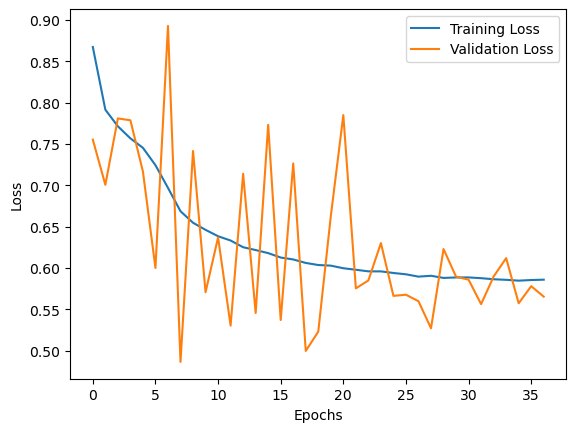

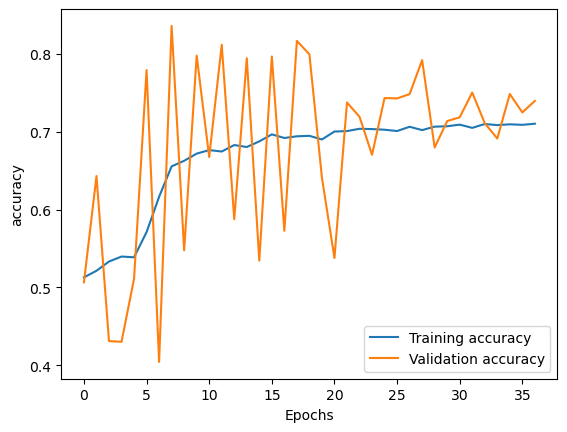

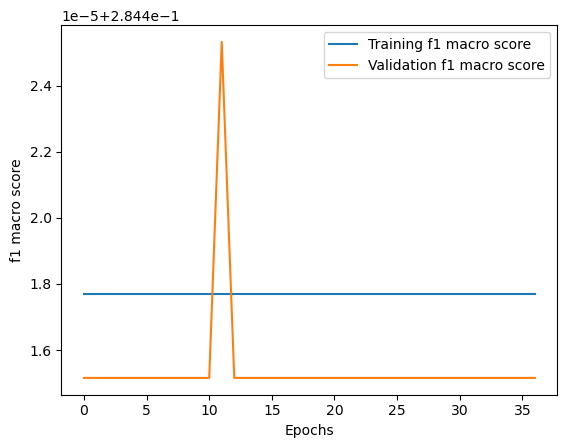

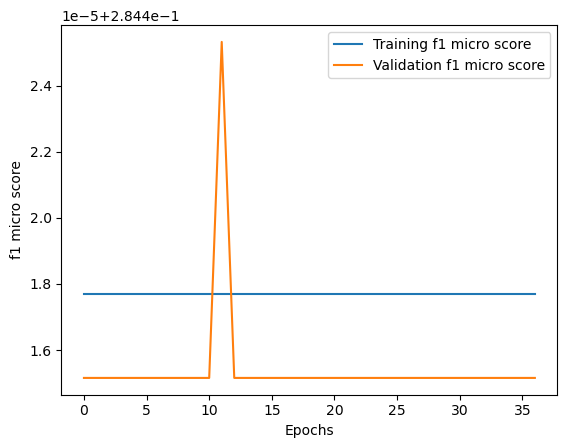

In [238]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['f1_macro'], label='Training f1 macro score')
plt.plot(history.history['val_f1_macro'], label='Validation f1 macro score')
plt.xlabel('Epochs')
plt.ylabel('f1 macro score')
plt.legend()
plt.show()

plt.plot(history.history['f1_micro'], label='Training f1 micro score')
plt.plot(history.history['val_f1_micro'], label='Validation f1 micro score')
plt.xlabel('Epochs')
plt.ylabel('f1 micro score')
plt.legend()
plt.show()

In [284]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [7, 10, 13],
} 

grid_search_XGBC = GridSearchCV(XGBClassifier(random_state=24), param_grid, cv=5, scoring='f1')
model_XGBC = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier",grid_search_XGBC)
])
model_XGBC.fit(X, y)

y_pred = model_XGBC.predict(X_test)

print(f"Train score: {model_XGBC.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 1.0
Accuracy: 1.0
Macro F1 Score: 1.0
Micro F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19987
           1       1.00      1.00      1.00      3972

    accuracy                           1.00     23959
   macro avg       1.00      1.00      1.00     23959
weighted avg       1.00      1.00      1.00     23959

Confusion Matrix:
 [[19987     0]
 [    0  3972]]


In [ ]:
calibrated_clf = CalibratedClassifierCV(
    estimator=XGBClassifier(**grid_search_XGBC.best_params_),
    method='isotonic',  
    cv=5,             
    n_jobs=-1
)


model_XGBC_best_params = Pipeline(steps=[
    ("standard_scaler", StandardScaler()),
    ("Classifier", calibrated_clf)
])

model_XGBC_best_params.fit(X, y)

y_pred = model_XGBC_best_params.predict(X_test)

print(f"Train score: {model_XGBC_best_params.score(X_train, y_train)}")
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Macro F1 Score:", f1_macro)
print("Micro F1 Score:", f1_micro)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Train score: 0.9687275003912975
Accuracy: 0.9694895446387579
Macro F1 Score: 0.9403483620596389
Micro F1 Score: 0.9694895446387579

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     19987
           1       1.00      0.82      0.90      3972

    accuracy                           0.97     23959
   macro avg       0.98      0.91      0.94     23959
weighted avg       0.97      0.97      0.97     23959

Confusion Matrix:
 [[19987     0]
 [  731  3241]]


In [286]:
predicted_proba = model_XGBC_best_params.predict_proba(X)

f1_score((predicted_proba[:,1]  >= 0.2).astype(int), y)

0.9800148038490007

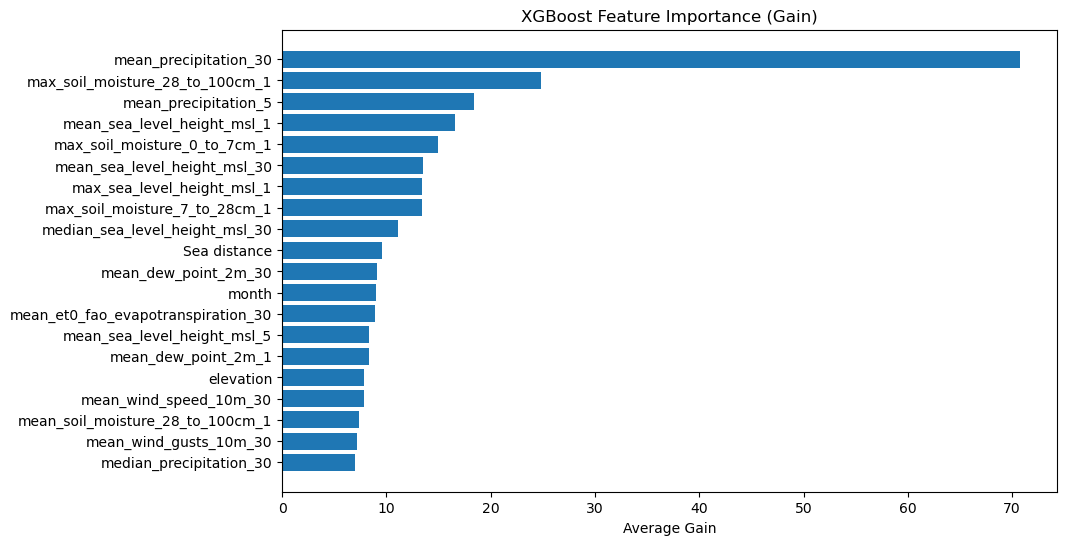

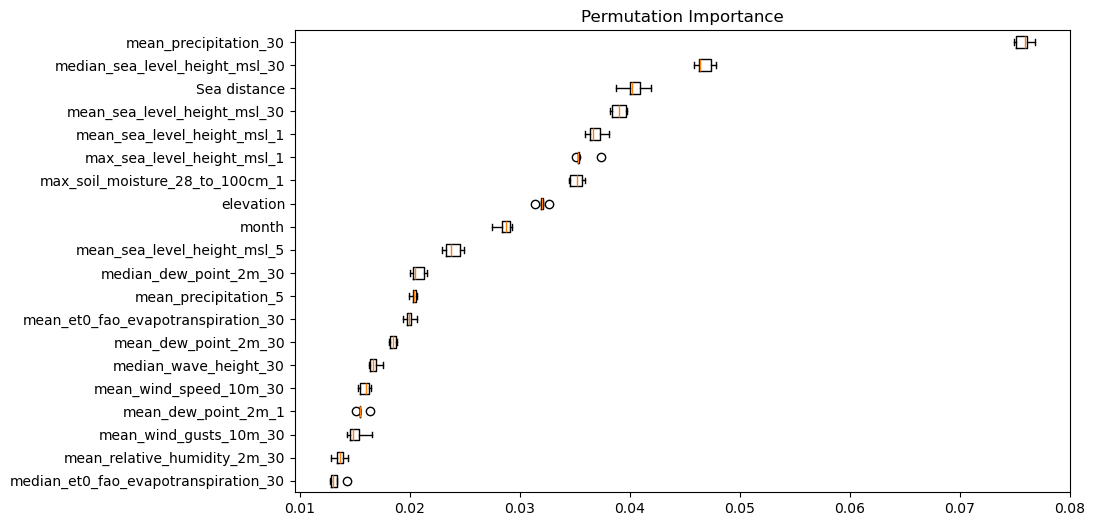

In [ ]:
feature_names = X_train.columns.tolist() 

calibrated_clf = model_XGBC_best_params.named_steps['Classifier']
base_estimators = [clf.estimator for clf in calibrated_clf.calibrated_classifiers_]

importance_gains = []
for estimator in base_estimators:
    gain = estimator.get_booster().get_score(importance_type='gain')
    importance_gains.append([
        gain.get(f'f{i}', 0) for i in range(len(feature_names))
    ])

importance_gain_mapped = {
    feature_map[key]: value 
    for key, value in importance_gain.items()
    if key in feature_map
}
avg_gain = np.mean(importance_gains, axis=0)
importance_df = pd.DataFrame({
    'feature': feature_names,
    'gain': avg_gain
}).sort_values('gain', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:20], importance_df['gain'][:20])
plt.gca().invert_yaxis()
plt.title('XGBoost Feature Importance (Gain)')
plt.xlabel('Average Gain')
plt.show()

result = permutation_importance(
    model_XGBC_best_params,  
    X_test, 
    y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.boxplot(
    result.importances[sorted_idx[-20:]].T,  
    vert=False,
    labels=X_test.columns[sorted_idx[-20:]]
)
plt.title("Permutation Importance")
plt.show()

In [302]:
joblib.dump(model_XGBC_best_params, 'output/model_XGBC_predict_flood.pkl')

['output/model_XGBC_predict_flood.pkl']